In [1]:
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()

Importing plotly failed. Interactive plots will not work.


In [2]:
df=pd.read_excel('covid.xlsx')

In [3]:
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,?,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,NaN,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,NaN,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0
...,...,...,...,...,...,...,...,...
16724,16725,04/19/2020,Wyoming,US,2020-04-19 23:49:00,313,2,0
16725,16726,04/19/2020,Xinjiang,Mainland China,2020-04-19 23:49:00,76,3,73
16726,16727,04/19/2020,Yukon,Canada,2020-04-19 23:49:00,9,0,0
16727,16728,04/19/2020,Yunnan,Mainland China,2020-04-19 23:49:00,184,2,178


In [153]:
df['Month'] = pd.to_datetime(df['Month'],format='%d-%m')
df

,Month,Sales
0,1900-01-01,266.0
1,1900-02-01,145.9
2,1900-03-01,183.1
3,1900-04-01,119.3
4,1900-05-01,180.3
5,1900-06-01,168.5
6,1900-07-01,231.8
7,1900-08-01,224.5
8,1900-09-01,192.8
9,1900-10-01,122.9


In [4]:
df = df.rename(columns={'ObservationDate': 'ds',
                        'Confirmed': 'y'})

df.head(5)

,SNo,ds,Province/State,Country/Region,Last Update,y,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,?,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,NaN,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,NaN,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [138]:
df

,ds,y
0,1900-01-01,266.0
1,1900-02-01,145.9
2,1900-03-01,183.1
3,1900-04-01,119.3
4,1900-05-01,180.3
5,1900-06-01,168.5
6,1900-07-01,231.8
7,1900-08-01,224.5
8,1900-09-01,192.8
9,1900-10-01,122.9


In [139]:
ax = df.set_index('ds')

In [140]:
len(df)

36

In [141]:
len(future)

24

# Train/test split

In [142]:
train=df.iloc[:18]
test=df.iloc[18:]

In [143]:
train

,ds,y
0,1900-01-01,266.0
1,1900-02-01,145.9
2,1900-03-01,183.1
3,1900-04-01,119.3
4,1900-05-01,180.3
5,1900-06-01,168.5
6,1900-07-01,231.8
7,1900-08-01,224.5
8,1900-09-01,192.8
9,1900-10-01,122.9


In [144]:
144-24

120

In [147]:
n1=pd.infer_freq(train['ds'].index(), warn=True)

TypeError: 'RangeIndex' object is not callable

In [146]:
n1

In [119]:
m=Prophet()
m.fit(train)
future=m.make_future_dataframe(periods=24,include_history=False,freq='MS')
forecast=m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.


In [120]:
forecast.tail(24)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1950-07-01,133.368450,117.749073,150.373826,133.368450,133.368450,0.0,0.0,0.0,0.0,0.0,0.0,133.368450
1,1950-08-01,133.903379,117.961203,149.875961,133.903378,133.903379,0.0,0.0,0.0,0.0,0.0,0.0,133.903379
2,1950-09-01,134.438308,119.669798,149.926558,134.438307,134.438308,0.0,0.0,0.0,0.0,0.0,0.0,134.438308
3,1950-10-01,134.955981,119.343977,150.592999,134.955980,134.955982,0.0,0.0,0.0,0.0,0.0,0.0,134.955981
4,1950-11-01,135.490910,121.299256,151.129000,135.490909,135.490911,0.0,0.0,0.0,0.0,0.0,0.0,135.490910
5,1950-12-01,136.008583,120.404347,153.254550,136.008582,136.008585,0.0,0.0,0.0,0.0,0.0,0.0,136.008583
6,1951-01-01,136.543513,120.102342,152.266099,136.543510,136.543515,0.0,0.0,0.0,0.0,0.0,0.0,136.543513
7,1951-02-01,137.078442,121.155120,152.707438,137.078439,137.078444,0.0,0.0,0.0,0.0,0.0,0.0,137.078442
8,1951-03-01,137.561603,121.800007,153.120256,137.561600,137.561607,0.0,0.0,0.0,0.0,0.0,0.0,137.561603
9,1951-04-01,138.096532,122.535986,153.427166,138.096529,138.096536,0.0,0.0,0.0,0.0,0.0,0.0,138.096532


In [74]:
test

,ds,Sales
18,1900-07-02,226.0
19,1900-08-02,303.6
20,1900-09-02,289.9
21,1900-10-02,421.6
22,1900-11-02,264.5
23,1900-12-02,342.3
24,1900-01-03,339.7
25,1900-02-03,440.4
26,1900-03-03,315.9
27,1900-04-03,439.3


KeyError: 'y'

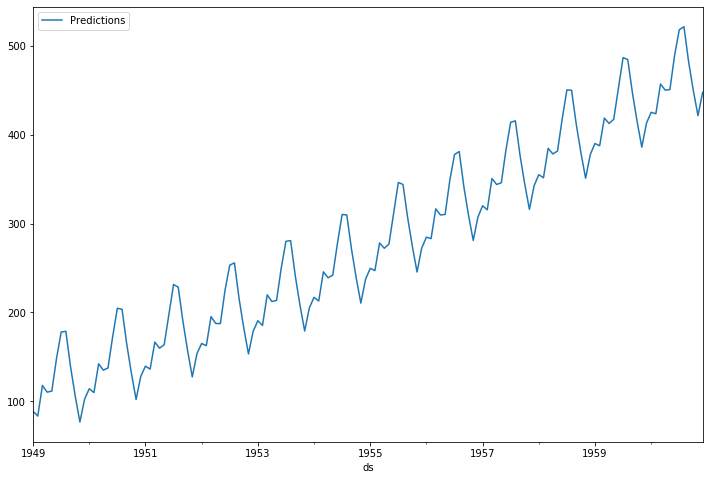

In [75]:
ax=forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))
test.plot(x='ds',y='y',label='True Test Data',legend=True,ax=ax,xlim=('1959-01-01','1961-01-01'))

In [59]:
test

,ds,Sales


In [60]:
forecast.tail(24)['yhat']

120    390.144957
121    387.611267
122    418.748082
123    412.771103
124    417.394855
125    452.307993
126    486.853251
127    484.609345
128    447.070126
129    414.840373
130    386.040766
131    413.087934
132    425.221126
133    423.636770
134    457.147070
135    450.207174
136    450.857959
137    489.371475
138    518.201899
139    521.656952
140    482.070668
141    449.742659
142    421.542644
143    447.813083
Name: yhat, dtype: float64

In [61]:
from statsmodels.tools.eval_measures import rmse

In [62]:
predictions=forecast.iloc[-24:]['yhat']

In [63]:
predictions

120    390.144957
121    387.611267
122    418.748082
123    412.771103
124    417.394855
125    452.307993
126    486.853251
127    484.609345
128    447.070126
129    414.840373
130    386.040766
131    413.087934
132    425.221126
133    423.636770
134    457.147070
135    450.207174
136    450.857959
137    489.371475
138    518.201899
139    521.656952
140    482.070668
141    449.742659
142    421.542644
143    447.813083
Name: yhat, dtype: float64

In [67]:
test

,ds,Sales


In [65]:
rmse(predictions,test['y'])

KeyError: 'y'

In [66]:
df

,ds,Sales
0,1900-01-01,266.0
1,1900-02-01,145.9
2,1900-03-01,183.1
3,1900-04-01,119.3
4,1900-05-01,180.3
5,1900-06-01,168.5
6,1900-07-01,231.8
7,1900-08-01,224.5
8,1900-09-01,192.8
9,1900-10-01,122.9


In [29]:
m=Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
future=m.make_future_dataframe(periods=24)

In [34]:
forecast=m.predict(future)

In [35]:
forecast.tail(24)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
120,1958-12-02,407.545440,352.786320,402.356194,407.545440,407.545440,-30.252980,-30.252980,-30.252980,-30.252980,-30.252980,-30.252980,0.0,0.0,0.0,377.292460
121,1958-12-03,407.641632,352.081323,401.179899,407.641632,407.641632,-30.790241,-30.790241,-30.790241,-30.790241,-30.790241,-30.790241,0.0,0.0,0.0,376.851391
122,1958-12-04,407.737824,353.656268,398.072668,407.737824,407.737824,-31.224454,-31.224454,-31.224454,-31.224454,-31.224454,-31.224454,0.0,0.0,0.0,376.513370
123,1958-12-05,407.834016,354.194544,400.710953,407.834016,407.834016,-31.537307,-31.537307,-31.537307,-31.537307,-31.537307,-31.537307,0.0,0.0,0.0,376.296709
124,1958-12-06,407.930209,352.236812,397.565461,407.930209,407.930209,-31.715343,-31.715343,-31.715343,-31.715343,-31.715343,-31.715343,0.0,0.0,0.0,376.214866
125,1958-12-07,408.026401,352.008760,398.187815,408.026401,408.026401,-31.750255,-31.750255,-31.750255,-31.750255,-31.750255,-31.750255,0.0,0.0,0.0,376.276146
126,1958-12-08,408.122593,351.885700,399.635391,408.122593,408.122593,-31.638999,-31.638999,-31.638999,-31.638999,-31.638999,-31.638999,0.0,0.0,0.0,376.483594
127,1958-12-09,408.218785,351.830499,400.403696,408.218785,408.218785,-31.383726,-31.383726,-31.383726,-31.383726,-31.383726,-31.383726,0.0,0.0,0.0,376.835059
128,1958-12-10,408.314977,353.194271,402.095186,408.314977,408.314977,-30.991541,-30.991541,-30.991541,-30.991541,-30.991541,-30.991541,0.0,0.0,0.0,377.323437
129,1958-12-11,408.411170,353.159868,402.521496,408.411170,408.411170,-30.474093,-30.474093,-30.474093,-30.474093,-30.474093,-30.474093,0.0,0.0,0.0,377.937076


In [36]:
forecast[['ds','yhat_lower','yhat_upper','yhat']].tail(24)

,ds,yhat_lower,yhat_upper,yhat
120,1958-12-02,352.786320,402.356194,377.292460
121,1958-12-03,352.081323,401.179899,376.851391
122,1958-12-04,353.656268,398.072668,376.513370
123,1958-12-05,354.194544,400.710953,376.296709
124,1958-12-06,352.236812,397.565461,376.214866
125,1958-12-07,352.008760,398.187815,376.276146
126,1958-12-08,351.885700,399.635391,376.483594
127,1958-12-09,351.830499,400.403696,376.835059
128,1958-12-10,353.194271,402.095186,377.323437
129,1958-12-11,353.159868,402.521496,377.937076


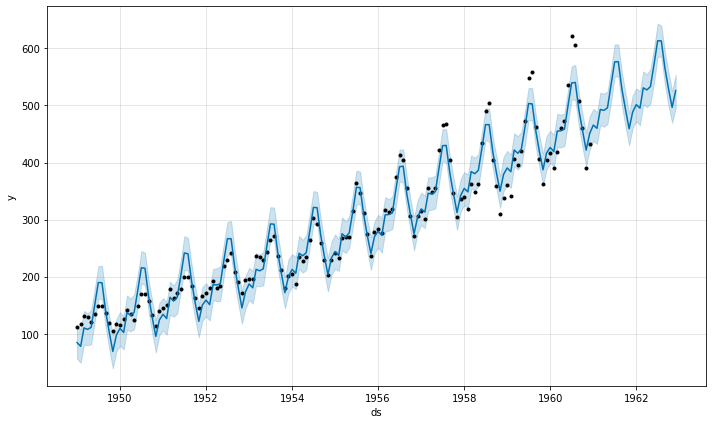

In [103]:
m.plot(forecast);

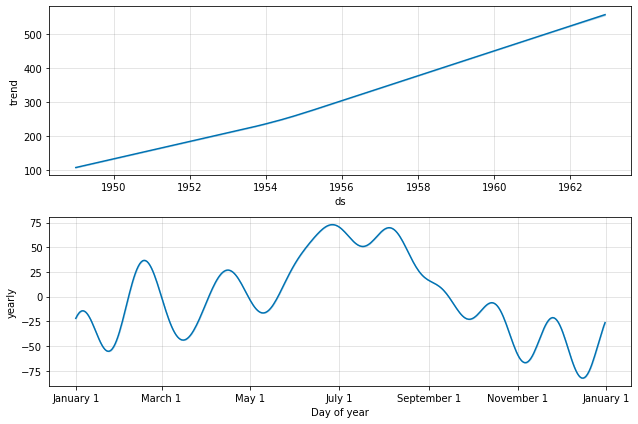

In [104]:
m.plot_components(forecast);

In [106]:
df

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [131]:
predictions=forecast.iloc[:144]['yhat']

In [132]:
df['y']

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: y, Length: 144, dtype: int64

In [133]:
rmse(df['y'],predictions)

22.485716327077323

In [137]:
forecast[['ds','yhat']].tail(24)

,ds,yhat
144,1961-01-01,465.580501
145,1961-02-01,459.934035
146,1961-03-01,492.984702
147,1961-04-01,491.401748
148,1961-05-01,495.816279
149,1961-06-01,536.683870
150,1961-07-01,576.300921
151,1961-08-01,576.710480
152,1961-09-01,528.214980
153,1961-10-01,492.978623


In [135]:
predictions

144    465.580501
145    459.934035
146    492.984702
147    491.401748
148    495.816279
149    536.683870
150    576.300921
151    576.710480
152    528.214980
153    492.978623
154    459.169728
155    488.531726
156    501.446823
157    495.298731
158    530.853491
159    527.184579
160    533.132263
161    572.739099
162    613.206031
163    613.118130
164    565.096371
165    529.470268
166    496.581888
167    526.086583
Name: yhat, dtype: float64